<a href="https://colab.research.google.com/github/Deinbi/Machine__Learning_Alura/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

En este curso, vamos a crear un proyecto de clasificación de clientes morosos en una empresa de financiamiento de automóviles. La Scikit-Learn será la principal biblioteca utilizada para realizar la validación y evaluación del rendimiento de los modelos de clasificación durante el curso. Explorar la documentación de esta biblioteca puede brindarte una excelente oportunidad para mejorar tus habilidades y adquirir mayor autonomía en la validación y en las métricas de modelos a lo largo del curso. Por lo tanto, a medida que avancemos, aprovecha este recurso adicional en tu aprendizaje.

Datos del proyecto
Para realizar la clasificación de los clientes, se utilizará una base de datos para alimentar nuestro proyecto. El uso de esta base es esencial, ya que, una vez descargada, proporciona la información necesaria para construir nuestros modelos de clasificación y te ofrece valiosa experiencia práctica en machine learning.

Google Colaboratory
Vamos a utilizar Google Colaboratory, que ya viene con las bibliotecas necesarias, incluida la Scikit-Learn en la versión 1.2.2, para construir el proyecto. Para que puedas usarlo, es necesario tener una cuenta de Gmail, ya que todo notebook se almacenará en Google Drive.

Si deseas utilizar el notebook inicial del instructor para desarrollar el proyecto, puedes obtenerlo a través del Proyecto - validación y métricas.

Al seguir este camino, tendrás un desarrollo eficaz, siendo capaz de adquirir habilidades valiosas en ciencia de datos mientras contribuyes a mejorar la toma de decisiones de la empresa de financiamiento de automóviles, todo de forma colaborativa y accesible.

---



# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [20]:
import pandas as pd

In [21]:
datos = pd.read_csv('/content/prestacar.csv')

In [22]:
datos.head(1)

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.4,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0


In [23]:
X = datos.drop(columns='moroso',axis=1)

In [24]:
X.head(1)

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono
0,12600.0,3569.4,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0


In [25]:
y = datos.moroso

In [26]:
y

,moroso
0,0
1,0
2,0
3,0
4,0
...,...
54020,1
54021,1
54022,1
54023,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [28]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


Generamos un modelo inicial de árbol de decisión para determinar si un cliente era moroso o no, y nuestro modelo nos dio una exactitud del 100%. Pero, ¿lo hicimos de la forma correcta?

La manera en que ejecutamos ese primer modelo es similar a darle a una persona un examen con las respuestas y, después de que esa persona tenga acceso a ese examen con todas las respuestas, presentarle exactamente el mismo examen con las mismas respuestas. Si la persona memoriza ese examen con las mismas palabras y respuestas, entonces el día de mañana que le quieras preguntar algo similar con otras palabras, tal vez la persona no tenga la capacidad de generalizar bien el concepto porque se dedicó a memorizar.

Lo mismo sucede con los modelos de Machine Learning (Aprendizaje Automático). Si entreno y pruebo mi modelo con el mismo conjunto de datos, eso es igual a que el modelo memorice completamente todas las salidas. Por eso, en el caso específico del árbol de decisión, mi modelo siempre va a llegar a un 100% de exactitud.



---
Durante la construcción de un modelo para clasificar transacciones bancarias como legítimas o fraudulentas, una persona científica de datos utilizó la biblioteca Scikit-Learn, que ofrece diversos algoritmos de machine learning que pueden ser utilizados para la clasificación de datos. En cada uno de estos algoritmos, el método fit() se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.

Sin embargo, después del entrenamiento del modelo, se realiza un paso más mediante el uso del método score(). Seleccione la alternativa que describe de manera adecuada la finalidad de usar el score() en este contexto:

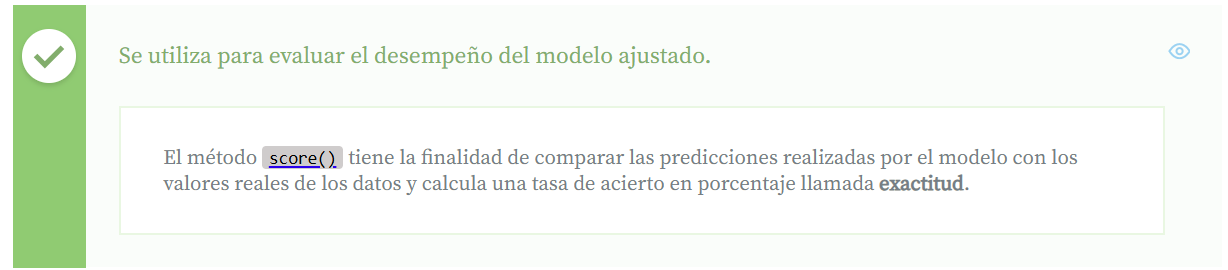


---



### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

Entonces, la buena práctica cuando trabajamos con Machine Learning es tener tres conjuntos de datos. Podríamos hablar de dos conjuntos: uno compuesto por un conjunto de prueba y el otro conjunto compuesto por el conjunto de entrenamiento y el conjunto de validación.

¿Cuál es el objetivo? Que desde el principio, aísle un grupo de mis datos para probarlo sólo al final, que nunca vea los datos que voy a dejar en el grupo de prueba para poder ver que efectivamente mi modelo está generalizando bien con datos que nunca vio, es decir, simulando un ambiente de producción de un modelo de Machine Learning.

Entonces, tenemos una parte de prueba y en el otro conjunto tenemos la parte dedicada a entrenamiento y validación. Entonces, tengo lógicamente un segmento para entrenar mi modelo y un segmento para validarlo. ¿Entonces cuál es la idea? Que este de validación no lo vea durante entrenamiento y únicamente lo use a la hora de validar si el entrenamiento está generalizando bien o no.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

En nuestro caso, vamos a hacer primero la separación para el entrenamiento y validación y para prueba, y después vamos a hacer la separación de entrenamiento y validación efectivamente. ¿Cómo lo hacemos? Vamos a tomar nuestra X, nuestra X, Test, vamos a tomar nuestra Y y nuestra Y, Test que van a ser los de prueba y vamos a hacer lo siguiente Train, Test, Split. Vamos a introducirle nuestra X, nuestra Y, vamos a tomar una base de prueba Test, Size del 15%, 0.15 y vamos a utilizar el método Stratify.

¿Cuál es el objetivo de hacer este Stratify? Que deje la misma cantidad de observaciones para morosos en los dos conjuntos de datos que estoy separando. ¿Qué quiere decir ello? Que si en mi conjunto de prueba tengo un 10% de morosos, también quiero que en mi conjunto de entrenamiento y validación exista un 10% de morosos. Entonces, esa es la idea y vamos a hacer este Stratify utilizando nuestra Y.

Por último, vamos a establecer un estado de aleatoriedad RandomState y vamos a darle el número 5. El estado de aleatoriedad básicamente nos permite replicar esta misma división en cualquier momento, es decir, la forma en que voy a dividir mis muestras en este ejercicio podrá replicarse en cualquier máquina, porque siempre que utilice el RandomState 5 él va a dividir de la misma manera, por eso se llama un estado de pseudo aleatoriedad.

Ahora vamos a hacer lo mismo pero para la validación. Entonces, vuelvo y tomo mi nueva X y mi nueva Y, ¿verdad? Y en vez de XTEST aquí voy a llamar XVAL y YVAL, ¿ok?

Y aquí, en lugar de dejarlo como X, lo voy a cambiar a XTRAIN y en lugar de dejar Y así, lo voy a cambiar a YTRAIN. De esta manera, ya segmento mis datos para entrenamiento y para prueba. No voy a especificar el tamaño de la prueba porque por defecto es el 25%. Si observas aquí, indica que cuando no se aplica un tamaño de prueba, se configura al 25%, así que lo dejaré así, ¿de acuerdo? Y el resto permanece igual. Entonces, ejecutamos nuestra celda.

In [31]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8490549603693058


En nuestro caso, vamos a hacer primero la separación para el entrenamiento y validación y para prueba, y después vamos a hacer la separación de entrenamiento y validación efectivamente. ¿Cómo lo hacemos? Vamos a tomar nuestra X, nuestra X, Test, vamos a tomar nuestra Y y nuestra Y, Test que van a ser los de prueba y vamos a hacer lo siguiente Train, Test, Split. Vamos a introducirle nuestra X, nuestra Y, vamos a tomar una base de prueba Test, Size del 15%, 0.15 y vamos a utilizar el método Stratify.

¿Cuál es el objetivo de hacer este Stratify? Que deje la misma cantidad de observaciones para morosos en los dos conjuntos de datos que estoy separando. ¿Qué quiere decir ello? Que si en mi conjunto de prueba tengo un 10% de morosos, también quiero que en mi conjunto de entrenamiento y validación exista un 10% de morosos. Entonces, esa es la idea y vamos a hacer este Stratify utilizando nuestra Y.

Por último, vamos a establecer un estado de aleatoriedad RandomState y vamos a darle el número 5. El estado de aleatoriedad básicamente nos permite replicar esta misma división en cualquier momento, es decir, la forma en que voy a dividir mis muestras en este ejercicio podrá replicarse en cualquier máquina, porque siempre que utilice el RandomState 5 él va a dividir de la misma manera, por eso se llama un estado de pseudo aleatoriedad.

Ahora vamos a hacer lo mismo pero para la validación. Entonces, vuelvo y tomo mi nueva X y mi nueva Y, ¿verdad? Y en vez de XTEST aquí voy a llamar XVAL y YVAL, ¿ok?

Y aquí, en lugar de dejarlo como X, lo voy a cambiar a XTRAIN y en lugar de dejar Y así, lo voy a cambiar a YTRAIN. De esta manera, ya segmento mis datos para entrenamiento y para prueba. No voy a especificar el tamaño de la prueba porque por defecto es el 25%. Si observas aquí, indica que cuando no se aplica un tamaño de prueba, se configura al 25%, así que lo dejaré así, ¿de acuerdo? Y el resto permanece igual. Entonces, ejecutamos nuestra celda.

Observa que durante el entrenamiento, ¿verdad? Llegó al 100%, ¿de acuerdo? Y a la hora de validar, llegó al 84%. ¿Qué significa esto? Que mi modelo de árbol se memorizó completamente todas las salidas y por eso llegó al 100% y al momento de colocar datos que no ha visto, al momento de validarlo, entonces llegó al 84%.

**Esta no es la mejor forma de instanciar un modelo de
árbol de decisión**, sino que debemos establecer una profundidad al menos.

Entonces voy a colocar MAXDEPTH igual a 10, es decir, que baje 10 porque si no le coloco profundidad, se va a ir hasta el final.

Por eso es que llega al 100%, ¿de acuerdo? Entonces es simplemente colocar ese MAXDEPTH y ejecutamos nuestra celda.

In [32]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validación es de: 0.9055831373573731


Y ahora observa que ya con este parámetro, durante mi entrenamiento llegó a un 92% y la exactitud del modelo al momento de validarlo fue el 90%. ¿Cuál es la conclusión aquí? Está generalizando mejor. ¿Por qué? Porque no se está memorizando todas las salidas y únicamente ajustamos un parámetro, ¿de acuerdo? Entonces aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación del modelo, pero ahora también nos falta evaluarlo. Y eso lo veremos en nuestro próximo video.





---

Para saber más: método holdout

En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:

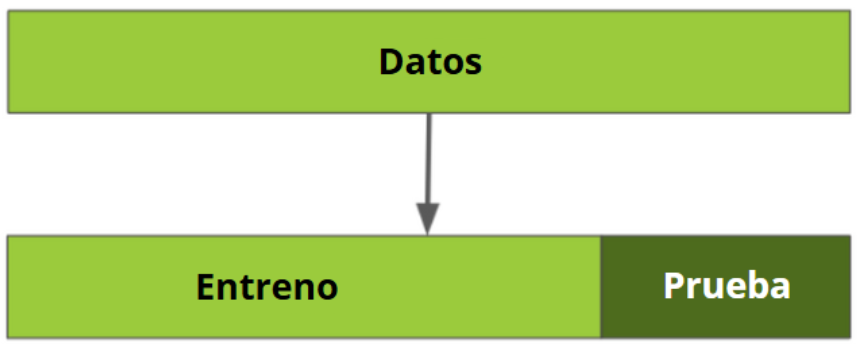


En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.

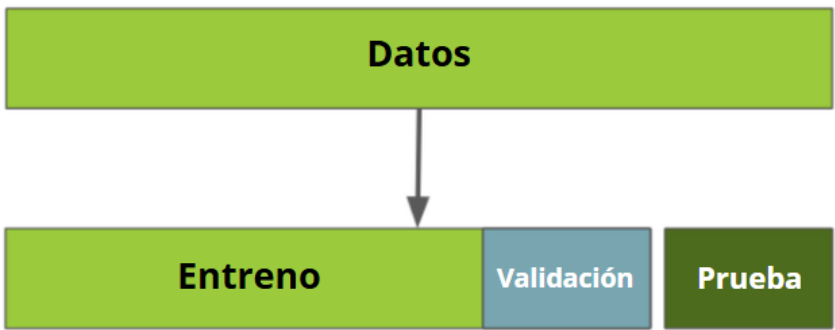




---



### Evaluando el modelo

Sin embargo, ¿qué significa precisión? Significa que en el 90% de los casos, mi modelo generalizó bien, por ejemplo, para este caso en la validación. Pero, ¿qué generalizó bien? Es decir, en el 90% de los casos, ¿qué sucedió? ¿Identificó cuántos deudores o cuántos clientes cumplidos? No tenemos esta visibilidad en este punto.

Por lo tanto, la precisión es una métrica que no nos dice mucho. Nos indica si el modelo está generalizando bien o no, pero no conocemos en detalle qué es lo que está generalizando y si es de nuestro interés. Para ello, vamos a utilizar también una herramienta para validar nuestros modelos, que es la matriz de confusión.

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10356   123]
 [  961    41]]


Observa que me devolvió una matriz, pero no sé realmente estos valores. 10,356, 123, 957, 45. ¿Pero qué? ¿Qué es qué? Entonces, para ello vamos a continuar aquí importando recursos. From sklearn.metrics import confusion_matrix display, que nos va a permitir dibujar nuestra matriz de confusión.

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

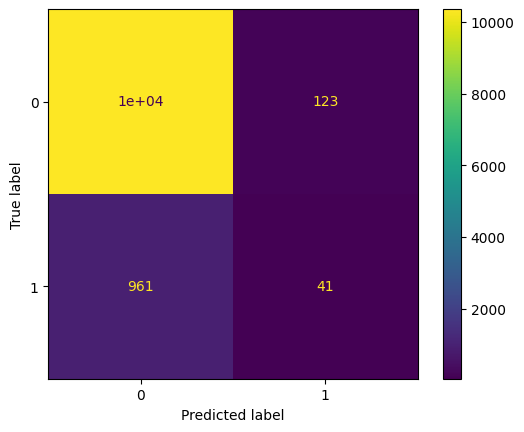

In [39]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

Tenemos nuestra matriz de confusión:

En el eje Y tenemos los valores reales, 0 siendo cumplido, 1 siendo deudor.

Y aquí en el eje X tenemos los valores previstos, 0 siendo cumplido y 1 siendo deudor.

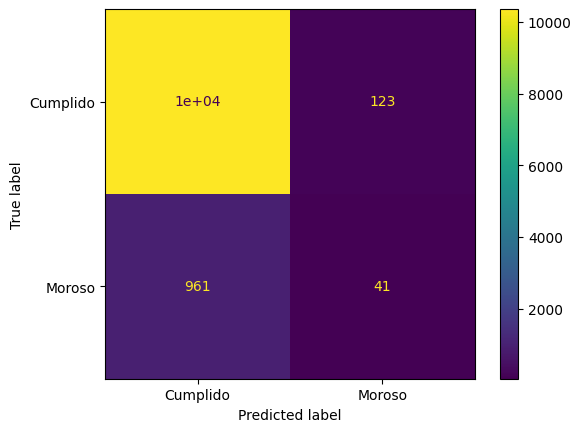

In [40]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

Perfecto. Entonces, ¿qué quiere decir mi matriz de confusión? Que de mi modelo, predijo cumplidos de todo el conjunto de datos, al momento de validar, más de 10,000 clientes de forma correcta. Sin embargo, hubo 957 clientes que mi modelo dijo que eran cumplidos, pero en realidad eran deudores. Es decir, 957 clientes fueron clasificados como clientes cumplidos, pero en realidad eran deudores.

Entonces, existe un riesgo muy grande aquí. Y en este lado, ¿verdad? Lo mismo sucede con los morosos. Mi modelo indicó que 123 clientes eran morosos, cuando en realidad eran cumplidos. Y solo identificó a 45 de estos morosos, ¿verdad? Es decir, solo clasificó de manera efectiva a 45 clientes morosos como morosos. Y de manera efectiva, más de 10,000 clientes cumplidos como cumplidos.

Estos números aquí, digamos, son los que nos permitirán trabajar con nuestro modelo para mejorarlo. Porque definitivamente queremos priorizar los casos en los que nuestro cliente realmente es moroso. Y no decir, por ejemplo, que es un cliente moroso cuando en realidad es cumplido. Entonces, dejaría de prestarle a 123 personas o a 123 clientes que me iban a pagar bien. Y estoy prestando a 957 clientes que no me van a pagar bien. Entonces, aquí, digamos, se está asumiendo un riesgo muy grande. Potencialmente, ¿no? Estamos hablando potencialmente.

###Para saber más de matriz de confusión

---

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

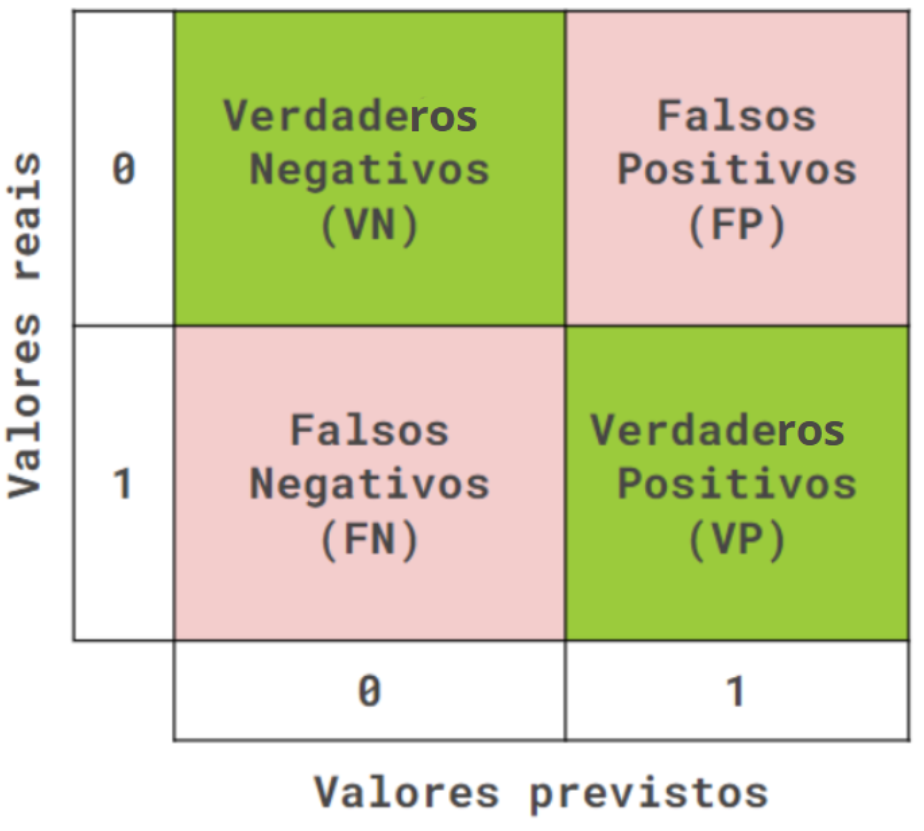

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

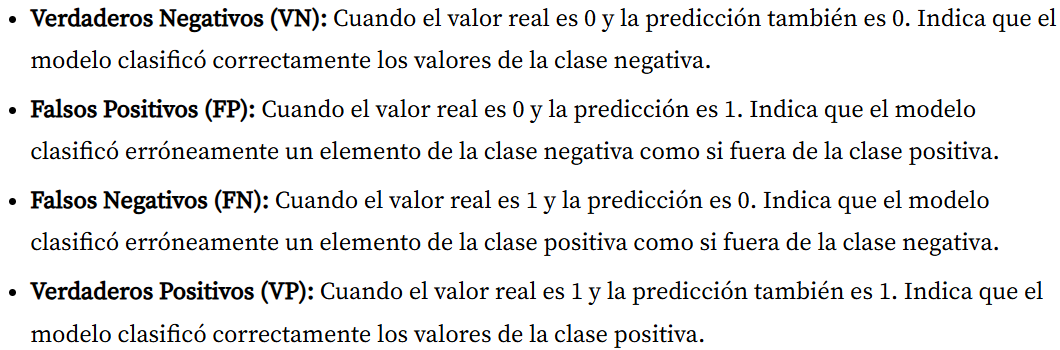


Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.









## <font color='dark'>Métricas de evaluación</h1>



---

Ya hemos generado un primer modelo de árbol de decisión para intentar predecir a los clientes morosos, ¿verdad? De esta manera, la entidad financiera puede evitar perder tanto dinero. Hemos llegado a esta herramienta muy útil que es la matriz de confusión. Sin embargo, hasta ahora no entendemos muy bien cuál es la utilidad de nuestra matriz de confusión. Simplemente obtuvimos algunos números, pero en realidad vamos a entender un poco mejor cómo interpretar la matriz de confusión y cuál es el error que debemos priorizar al modelar aquí con nuestros diversos recursos, ¿de acuerdo?

---



### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

También tenemos el caso donde el valor real era cero, pero yo predije que era un cliente moroso, entonces es un falso positivo, es decir, es un falso 1, es un falso moroso porque realmente este es cumplido. El falso positivo se conoce como error tipo 1.

Además, en este tercer cuadrante tengo los valores reales cuando es moroso, es decir, cuando es 1. Entonces, 1, y mi modelo dijo que era cumplido, es decir, que era cero, entonces es un falso negativo, es decir, yo lo predije como cero, falsamente, falso negativo, entonces tengo un error tipo 2.

Este número es muy importante. Y también tenemos los verdaderos positivos, que son los casos en los cuales el modelo efectivamente predijo clientes morosos que sí realmente eran morosos, entonces nota que únicamente hubo 45. Ya viendo estos números sin necesidad de entrar en fórmulas, ya sé que mi modelo no está generalizando bien.



---

Aquí tengo, entonces, las métricas que vamos a calcular, que son precisión, recall, y F1 score. Accuracy, o exactitud, que es la primera métrica que utilizamos que era score, ella únicamente suma verdaderos positivos y verdaderos negativos, es decir, suma estos 10,000, más de 10,000, más estos 45, y los divide en el total de observaciones, es decir, sumando todo, sumando todos estos cuadritos.

Entonces, lógicamente, si aquí tengo 10,000 y aquí tengo 45 y únicamente le estoy sumando 1,000 más, entonces el número va a quedar alrededor del 90%, es decir, 10,000 sobre 11,000, ¿sí? , algo así. Entonces yo no voy a entrar aquí a hacer cálculos en mi mente, pero para que utilicemos los recursos de Scikit-learn, entonces vamos a importar estas métricas.

---



<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

¿Qué es la precisión? Verdaderos positivos, es decir, true positive (verdadero positivo), 45, es decir, en 45 casos que él identificó que realmente eran morosos, dividido entre verdaderos positivos más falsos positivos, es decir, dividido entre este valor más este valor, entonces 45 sobre 45 más 123.

In [42]:
45/(45+123) #precision

0.26785714285714285

amos, voy a hacerlo aquí a mano antes de usar la biblioteca, entonces 45 dividido 45 sobre 123, esto es la precisión. Entonces voy a colocar aquí precisión, entonces, a ver, más 123, pues he dividido las dos veces, listo, da 26% de precisión, muy deficiente.

In [43]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.25
La sensibilidad (Recall) del modelo es: 0.04091816367265469
La exactitud (accuracy) del modelo es: 0.9055831373573731


La precisión de mi modelo es exactamente el número que les mostré aquí, el mismo cálculo lo hizo para recall, la sensibilidad. ¿Qué quiere decir esto? Que tiene un 4% de sensibilidad. ¿Por qué? ¿Cómo calcula la sensibilidad? Toma los verdaderos positivos, ¿verdad? Y los divide entre el valor de verdaderos positivos más falsos negativos, o sea, 45 dividido entre 45 más 957.

Entonces, ¿qué quiere decir esto? Estoy prestando dinero, o la financiera, la empresa financiera está financiando a muchas personas morosas, entonces esto es un problema muy serio.


**La métrica de validación que se va a utilizar, la que vamos a mejorar es el recall. **


Queremos disminuir al máximo el error tipo 2, y vamos a ver solo como referencia el F1 score, solo para tenerlo como referencia, ok.

In [44]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.07032590051457976


Entonces, voy a copiar aquí, pegar, el F1 score del modelo, que penaliza a mi modelo. ¿Qué hace? Toma, ¿verdad? dos veces la precisión por el recall, dividido entre la precisión más el recall. Entonces, penaliza a mi modelo, voy a tener también seguramente un valor cercano, aquí puse accuracy, es el F1, un valor cercano a 0, ok.


Entonces, 0.076, o sea, **mientras más lejos de 1, quiere decir que el modelo está desempeñándose muy mal, ok.**



---

---

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación, cada una de ellas tiene ventajas y limitaciones. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión. Las principales métricas de clasificación son:






---

---



**Exactitud**
Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

A continuación, podemos analizar el cálculo de la exactitud a partir de la matriz de confusión. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).

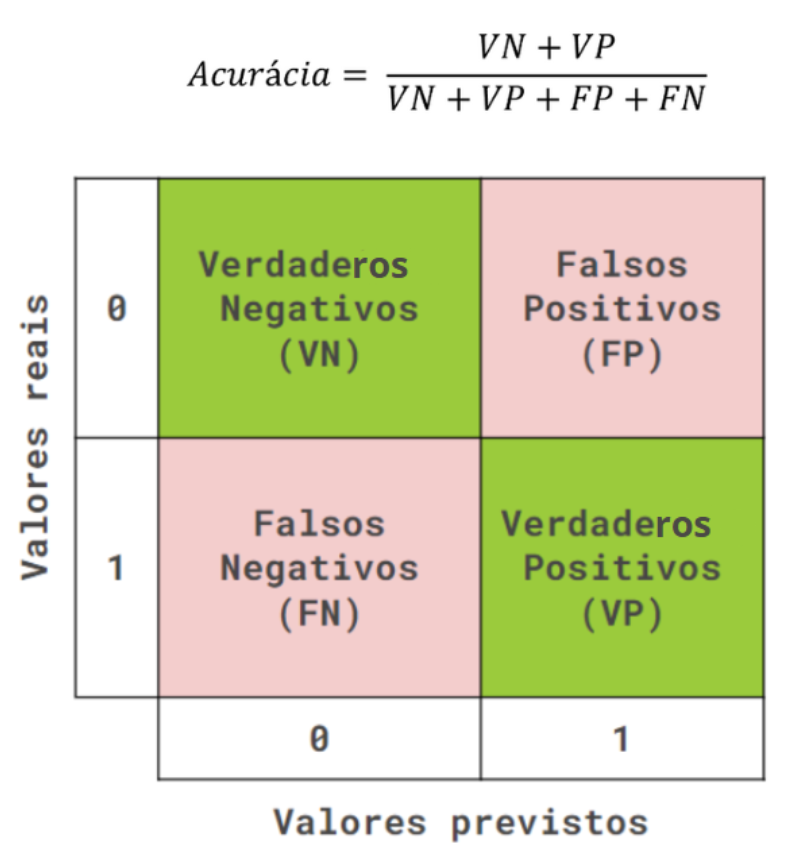

**Recuperación (recall)**

Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

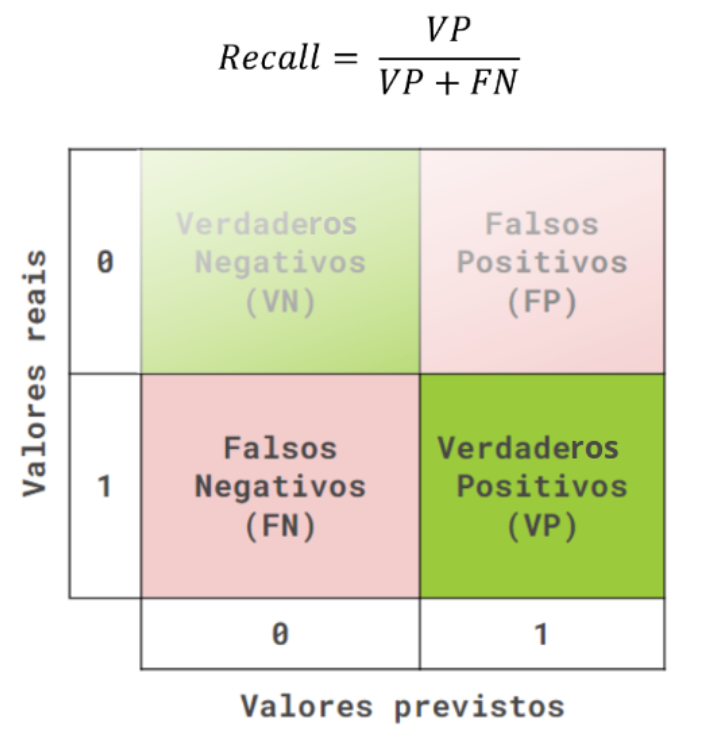

**Precisión**

Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

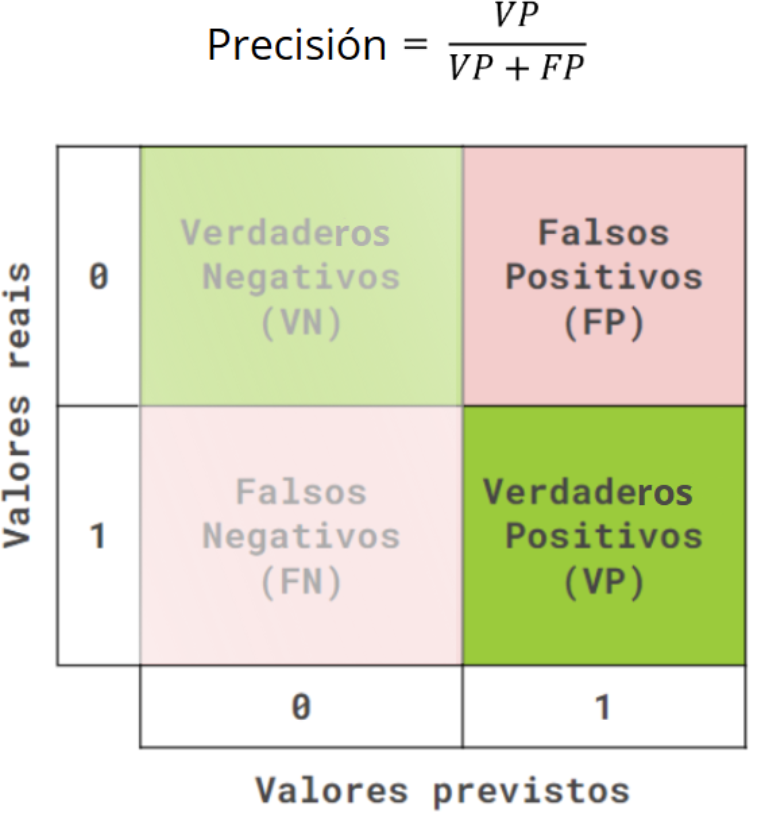

**F1-Score**

Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall:



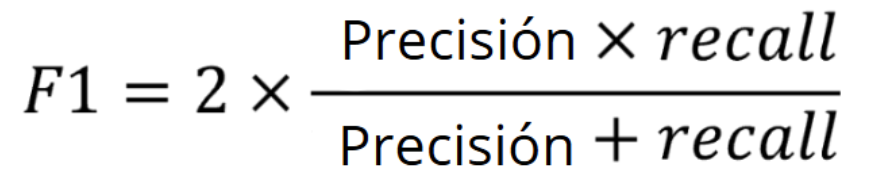



---

La elección de la métrica de clasificación adecuada depende del problema que se está resolviendo y de cada escenario. En los casos en que las clases están balanceadas y tienen importancia similar, la exactitud puede ser una buena métrica inicial. Sin embargo, cuando las clases están desequilibradas o los errores tienen costos diferentes, métricas como precisión, recall y F1-score son más indicadas.

---



### Curva ROC

Muy bien, ya tenemos tres métricas importantes que obtuvimos a partir de la Matriz de Confusión: la precisión, la sensibilidad o recall, y también el score F1. Sin embargo, existen otros mecanismos que podemos utilizar para validar nuestros modelos. Uno de ellos es la Curva ROC, o Receiver Operating Characteristic (Característica Operativa del Receptor).

In [33]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Entonces, ¿cómo se interpreta? Este color mostaza, que tengo aquí en mi gráfica, representa los verdaderos negativos. Este, que es como un mostaza más claro, falsos positivos. Este, azul, aguamarina, o azul claro, sería falsos negativos. Y este, azul, que es como un azul oscuro, verdadero positivo. Aquí tengo mi predictor. ¿Qué quiere decir esto? Este es como mi árbol de decisión de profundidad 10, que instancié y quedó así mi modelo.

A través de las Características Operativas del Receptor, lo que hago es ajustar mi modelo para priorizar una métrica sobre la otra. Entonces, volviendo a nuestra gráfica de la Matriz de Confusión, tengo esta métrica que son los morosos, es decir, los verdaderos positivos. Quiero que cuando sean morosos, mi modelo sea capaz de hacer una previsión correcta de que es moroso. Pero mi modelo, únicamente predijo 45 personas morosas y hubo personas que eran morosas, ¿verdad? 957, casi el 95% de las observaciones del total de morosos de la base fueron clasificados como cumplidos.

Entonces, ¿qué quiere decir esto? Que el 95% de las veces mi modelo está prestando a personas o potencialmente me va a llevar a hacer préstamos a personas que no van a pagar. Entonces, lo que quiero es disminuir el error tipo 2, es decir, aumentar mi puntaje de RECALL. Es decir, que tenga más identificados los morosos, es decir, que ya no sean 45, sino que en la medida de lo posible pueda maximizar la identificación o la clasificación de clientes morosos.

¿Cuál es el trade-off o a cambio de qué? Entonces, nota que también tengo una tasa de falsos positivos, que es el error tipo 1. Entonces, aquí tengo falsos positivos, ¿verdad? Y en la medida que identifique más morosos, lógicamente, mi número de falsos positivos va a aumentar y el número de personas cumplidas, que fue clasificada como cumplida, es decir, verdaderos negativos, va a disminuir porque estos valores van a ser, es decir, la suma de todos estos valores no va a cambiar. Lo único que se va a modificar es la distribución, como los voy a dejar clasificados al final.

Entonces, voy a disminuir a los cumplidos, los voy a volver falsos positivos para poder identificar a los morosos. Entonces, seguramente dejaré de recibir dinero de personas cumplidas, es decir, dejaré de hacer préstamos porque los voy a clasificar mal, siendo falsos positivos, a cambio de identificar a más morosos.

Entonces, la curva ROC, volviendo nuevamente a este gráfico, pensemos que este azul oscuro son los verdaderos positivos, es decir, los morosos. Entonces, en la medida que identifique más morosos, nota que también comienzo a sacrificar de este lado a personas. Es decir, digamos, me vengo aquí, clasifiqué a los 900 morosos de forma correcta, pero si trazo esta recta hasta arriba, esto quiere decir que voy a tener toda esta cantidad de falsos positivos, ¿verdad?, de mi base.

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




Entonces, si tengo una base de 10,000 personas, quiere decir que, para poder clasificar correctamente a mis 900 morosos, voy a sacrificar 9,000 personas de la base de datos que son cumplidas. Entonces, eso realmente es un problema, porque dejé de hacer préstamo a 9,000 personas para identificar a 900, tampoco es la idea.

La idea es encontrar en qué parte dejo ajustado mi modelo, ¿verdad?, en qué parte coloco esta recta para maximizar mi RECALL sin, digamos, afectar la precisión de mi modelo.

Entonces, el área bajo la curva, ¿verdad? Me ayuda a identificar este caso. Mientras más cerca esté a este lado, lógicamente, mejor para mi modelo, pero a cambio de qué, ¿verdad? ¿Cuál es el tradeoff (compensación)?

La curva AUC, en el mejor de los casos, es 100%. De esta forma, con Python y Scikit-Learn, podemos medir cómo está la curva AUC de nuestro modelo.

In [45]:
from sklearn.metrics import RocCurveDisplay

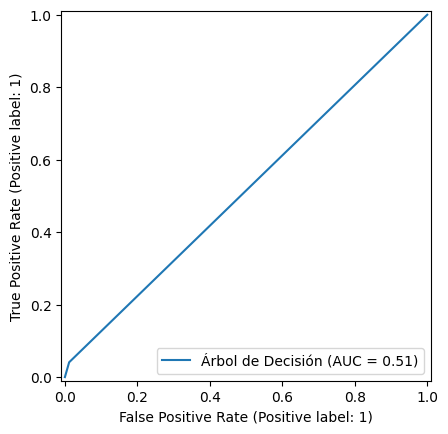

In [46]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');

Observa, la curva ROC de nuestro modelo solo aumentó un poco en esta región, y ya se fue aquí recta. ¿Qué quiere decir esto? Mientras más cerca esté aquí, es decir, esto significa aleatoriedad, 50-50, es producto de la aleatoriedad. Entonces, esto tampoco sirve, quiere decir que el modelo no está generalizando ni encontrando a las personas, ni clasificando bien.

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.5145902012179477


Ejecutamos nuestra celda, y vemos que el valor es 0.516. Aquí ya lo redondeo a 0.52. Pero entonces, esta es una forma de validar nuestro modelo, y en el próximo video vamos también a ver otra curva muy importante que nos permita observar la precisión versus la sensibilidad

### Curva de  precisión x sensibilidad

Otra métrica de validación muy importante, al igual que la curva ROC, donde medimos el área bajo la curva, es también la curva de precisión versus sensibilidad. El concepto es análogo al anterior, para ello también tengo aquí este GIF que nos permite analizar cómo este principio se aplica para precisión y recall (recuperación).

In [34]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


Entonces, ¿qué sucede? Aquí tengo diversos tipos de modelos de Machine Learning. Por ejemplo, un predictor clasifica de esta forma, otro predictor de esta forma, de esta forma, de esta forma. El predictor ideal es cuando logra aislar bien y determinar de forma perfecta o clasificar mejor de forma perfecta a cada categoría, entonces, morosos de un lado y cumplidos de otro. Supongamos que morosos es azul y cumplidos de rojo. El modelo ideal, es el que permite clasificarlos bien, y nota que la curva se acerca más a 1, mientras que cuando están sobrepuestos es todo producto de la aleatoriedad, puede ser el uno o el otro, entonces, por eso notas estos puntitos es cada una de las observaciones del modelo, entonces, cuando está sobrepuesto, quiere decir que está todo como aleatorio, está todo como mezclado.



---

**Entonces, aquí está todo mezclado y por eso queda este valor de área bajo la curva tan bajito, pero a medida que logramos aislar bien o separar bien cada una de estas clases, lógicamente, mi modelo va a ser mucho mejor.**

---



In [49]:
from sklearn.metrics import PrecisionRecallDisplay

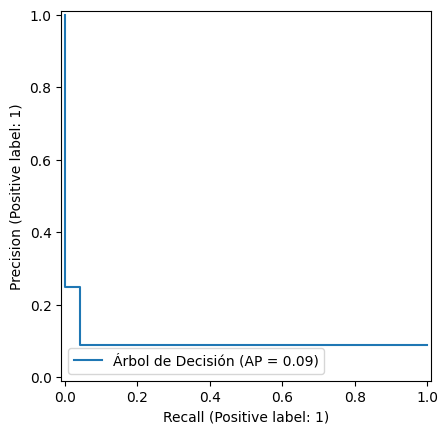

In [50]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de Decisión');

nota que es una curva también que nos permite ver la precisión y el recall, entonces, mira cómo quedó, él quedó como más preciso nuestro modelo, aquí está el 26% que vimos de precisión y el 4% que tiene de recall, entonces, el árbol de decisión, o sea, el promedio, el promedio del average precision recall es 0.10, o sea, la idea es que el promedio quede en 1, pero 0.10 es deficiente.

In [51]:
from sklearn.metrics import average_precision_score

In [52]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.0939330510653634


Ya vimos aquí varias métricas importantes, ya vimos precisión, recall, vimos exactitud, vimos curva ROC, área bajo la curva, vimos área bajo la curva de precisión y recall, y también el promedio de esta curva, sin embargo, podríamos ya traer todas estas métricas en un solo paso.



---



---

Para un análisis más detallado del resultado de un modelo de clasificación, es posible explorar métricas numéricas, matrices de confusión e incluso gráficos. Entre los gráficos



de análisis de rendimiento de modelos, dos se destacan: la curva ROC y la curva de precisión x recall.

A partir de esto, selecciona la alternativa que indica la diferencia entre la curva ROC y precisión x recall:


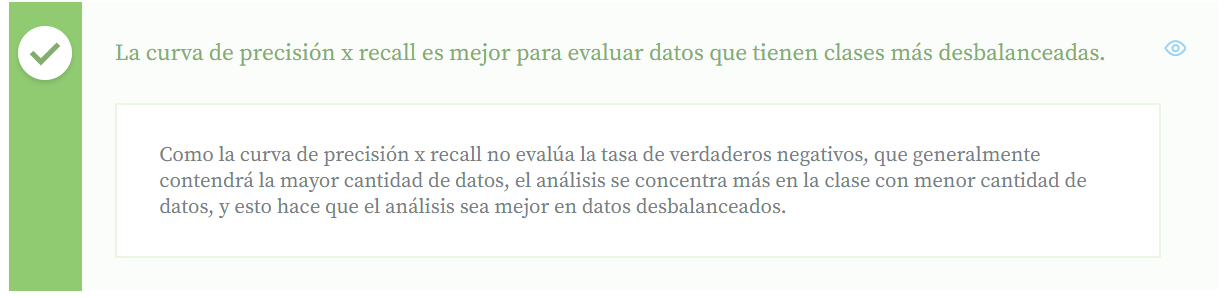



---


---



### Informe de métricas

In [34]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val,y_previsto))

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo